<a href="https://colab.research.google.com/github/vishhnu-17/Neural-Network-Regression-Model/blob/main/DL_1st_expt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('/content/dl_dataset_exp1.csv')
X = dataset1[['x_value']].values
y = dataset1[['y_value']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        # Include your code here
        self.fc1 = nn.Linear(1,16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,1)
        self.relu = nn.ReLU()
        self.history = {'loss':[]}
  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)


In [ ]:
# Name:
# Register Number:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    # Write your code here
  for epoch in range(epochs):
      optimizer.zero_grad()
      loss=criterion(ai_brain(X_train),y_train)
      loss.backward()
      optimizer.step()
      ai_brain.history['loss'].append(loss.item())
      if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 56545.070312
Epoch [200/2000], Loss: 32965.750000
Epoch [400/2000], Loss: 9072.117188
Epoch [600/2000], Loss: 5222.065430
Epoch [800/2000], Loss: 3371.625488
Epoch [1000/2000], Loss: 1413.352417
Epoch [1200/2000], Loss: 246.160233
Epoch [1400/2000], Loss: 12.485154
Epoch [1600/2000], Loss: 1.793956
Epoch [1800/2000], Loss: 0.065019


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 15.564342


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

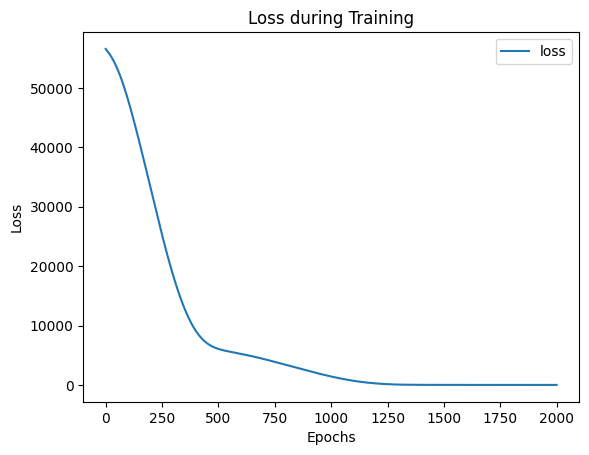

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 189.53897094726562
